In [802]:
import pandas as pd

In [803]:
!ls

data  facets  Graph  Titanic.ipynb


In [804]:
train_df=pd.read_csv("data/titanic/train.csv")

In [895]:
test_df = tdf=pd.read_csv("data/titanic/test.csv")

In [806]:
list(train_df.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [807]:
train_df[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [808]:
from IPython.core.display import display, HTML

In [809]:
features=[
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Survived',   
 'Embarked']

In [810]:
jsonstr = train_df.to_json(orient='records')

In [811]:
HTML_TEMPLATE = """<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html">
        <facets-dive id="elem" height="600"></facets-dive>
        <script>
          var data = {jsonstr};
          document.querySelector("#elem").data = data;
        </script>"""

In [812]:
html = HTML_TEMPLATE.format(jsonstr=jsonstr)

In [813]:
display(HTML(html))

In [814]:
!git clone https://github.com/pair-code/facets.git

fatal: destination path 'facets' already exists and is not an empty directory.


In [815]:
# Add the path to the feature stats generation code.
import sys
sys.path.insert(0, 'facets/facets_overview/python/')

# Create the feature stats for the datasets and stringify it.
import base64
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'train_df', 'table': train_df},
                                  {'name': 'test_df', 'table': test_df}])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

In [816]:
protostr

'CuWbBAoIdHJhaW5fZGYQ+wYavwcKC1Bhc3NlbmdlcklkGq8HCrMCCPsGGAEgAS0AAIA/MqQCGhsJAAAAAAAA8D8RAAAAAAAA8D8hZmZmZmZGVkAaGwkAAAAAAADwPxEAAAAAAADwPyFmZmZmZkZWQBobCQAAAAAAAPA/EQAAAAAAAPA/IWZmZmZmRlZAGhsJAAAAAAAA8D8RAAAAAAAA8D8hZmZmZmZGVkAaGwkAAAAAAADwPxEAAAAAAADwPyFmZmZmZkZWQBobCQAAAAAAAPA/EQAAAAAAAPA/IWZmZmZmRlZAGhsJAAAAAAAA8D8RAAAAAAAA8D8hZmZmZmZGVkAaGwkAAAAAAADwPxEAAAAAAADwPyFmZmZmZkZWQBobCQAAAAAAAPA/EQAAAAAAAPA/IWZmZmZmRlZAGhsJAAAAAAAA8D8RAAAAAAAA8D8hZmZmZmZGVkAgAREAAAAAAOB7QBmd/+mhWRNwQCkAAAAAAADwPzEAAAAAAOB7QDkAAAAAANiLQEKiAhobCQAAAAAAAPA/EQAAAAAAgFZAIQAAAAAAQFZAGhsJAAAAAACAVkARAAAAAABgZkAhAAAAAABAVkAaGwkAAAAAAGBmQBEAAAAAAMBwQCEAAAAAAEBWQBobCQAAAAAAwHBAEQAAAAAAUHZAIQAAAAAAQFZAGhsJAAAAAABQdkARAAAAAADge0AhAAAAAABAVkAaGwkAAAAAAOB7QBEAAAAAALiAQCEAAAAAAEBWQBobCQAAAAAAuIBAEQAAAAAAgINAIQAAAAAAQFZAGhsJAAAAAACAg0ARAAAAAABIhkAhAAAAAABAVkAaGwkAAAAAAEiGQBEAAAAAABCJQCEAAAAAAEBWQBobCQAAAAAAEIlAEQAAAAAA2ItAIQAAAAAAgFZAQqQCGhsJAAAAAAAA8D8RAAAAAACAVkAhZmZmZmZGVkAaGwkAAAAAAIBWQBEAAAAAAGBmQCFmZmZmZkZWQBobCQA

In [817]:
# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="https://raw.githubusercontent.com/PAIR-code/facets/master/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem2"></facets-overview>
        <script>
          document.querySelector("#elem2").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [818]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [819]:
train_df.shape

(891, 12)

In [820]:
train_df.isnull().sum()/train_df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [821]:
from sklearn.preprocessing import Imputer

In [822]:
import numpy as np

In [823]:
train_df[10:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C


In [824]:
from sklearn.preprocessing import Imputer

In [825]:
train_df[["Age"]]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
5,NaN
6,54.0
7,2.0
8,27.0
9,14.0


In [826]:
imr = Imputer(missing_values=np.nan, strategy='mean', axis=1)

/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [827]:
q = imr.fit_transform([train_df["Age"]])


In [828]:
q_test = imr.fit_transform([test_df["Age"]])

In [829]:
test_df["Age"]=q_test[0]

In [830]:
train_df["Age"]=q[0]

In [831]:
train_df["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
         ...    
861    21.000000
862    48.000000
863    29.699118
864    24.000000
865    42.000000
866    27.000000
867    31.000000
868    29.699118
869     4.000000
870    26.000000
871    47.000000
872    33.000000
873    47.000000
874    28.000000
875    15.000000
876    20.000000
877    19.000000
878    29.699118
879    56.000000
880    25.000000
881    33.000000
882    22.000000
883    28.000000
884    25.000000
885    39.000000
886    27.000000
887    19.000000
888    29.6991

In [832]:
train_df=train_df[features]

In [833]:
t_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked','PassengerId']

In [834]:
test_df=test_df[t_features]

In [835]:
train_df[:10]

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Embarked
0,3,male,22.000000,1,0,7.2500,NaN,0,S
1,1,female,38.000000,1,0,71.2833,C85,1,C
2,3,female,26.000000,0,0,7.9250,NaN,1,S
3,1,female,35.000000,1,0,53.1000,C123,1,S
4,3,male,35.000000,0,0,8.0500,NaN,0,S
5,3,male,29.699118,0,0,8.4583,NaN,0,Q
6,1,male,54.000000,0,0,51.8625,E46,0,S
7,3,male,2.000000,3,1,21.0750,NaN,0,S
8,3,female,27.000000,0,2,11.1333,NaN,1,S
9,2,female,14.000000,1,0,30.0708,NaN,1,C


In [836]:
train_df.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Survived      0
Embarked      2
dtype: int64

In [837]:
features

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Survived',
 'Embarked']

In [838]:
features=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',  'Embarked','Survived']

In [839]:
train_df=train_df[features]

In [840]:
train_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [841]:
from sklearn_pandas import CategoricalImputer

In [842]:
imp = CategoricalImputer()

In [843]:
q = imp.fit_transform(train_df["Embarked"])

In [844]:
q_test = imp.fit_transform(test_df["Embarked"])

In [845]:
q

array(['S', 'C', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'C', 'S', 'S', 'S',
       'S', 'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'Q', 'S', 'S', 'S',
       'C', 'S', 'Q', 'S', 'C', 'C', 'Q', 'S', 'C', 'S', 'C', 'S', 'S',
       'C', 'S', 'S', 'C', 'C', 'Q', 'S', 'Q', 'Q', 'C', 'S', 'S', 'S',
       'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C',
       'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'S', 'S', 'S', 'Q', 'S', 'C', 'S', 'S', 'C', 'S', 'Q',
       'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'Q', 'S', 'C', 'S',
       'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C',
       'Q', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',
       'S', 'S', 'Q', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S

In [846]:
train_df["Embarked"]=q

In [847]:
test_df["Embarked"]=q_test

In [848]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
5,3,male,29.699118,0,0,8.4583,Q,0
6,1,male,54.000000,0,0,51.8625,S,0
7,3,male,2.000000,3,1,21.0750,S,0
8,3,female,27.000000,0,2,11.1333,S,1
9,2,female,14.000000,1,0,30.0708,C,1


In [849]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [850]:
ohe = OneHotEncoder(categorical_features=[0])

In [851]:
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [852]:
create_ohe(train_df, "Sex")

/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0
6,0.0,1.0
7,0.0,1.0
8,1.0,0.0
9,1.0,0.0


In [853]:
categorical=["Sex","Embarked"]

In [854]:
numeric=['Pclass',  'Age', 'SibSp', 'Parch', 'Fare']

In [855]:
temp = train_df[numeric]
for column in categorical:
    temp_df = create_ohe(train_df,column)
    temp = pd.concat([temp,temp_df],axis=1)


/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "ca

In [856]:
temp_test = test_df[numeric+["PassengerId"]]
for column in categorical:
    temp_df = create_ohe(test_df,column)
    temp_test = pd.concat([temp_test,temp_df],axis=1)

/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "ca

In [857]:
temp_test

,Pclass,Age,SibSp,Parch,Fare,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,892,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,7.0000,893,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,9.6875,894,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,8.6625,895,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,12.2875,896,1.0,0.0,0.0,0.0,1.0
5,3,14.00000,0,0,9.2250,897,0.0,1.0,0.0,0.0,1.0
6,3,30.00000,0,0,7.6292,898,1.0,0.0,0.0,1.0,0.0
7,2,26.00000,1,1,29.0000,899,0.0,1.0,0.0,0.0,1.0
8,3,18.00000,0,0,7.2292,900,1.0,0.0,1.0,0.0,0.0
9,3,21.00000,2,0,24.1500,901,0.0,1.0,0.0,0.0,1.0


In [858]:
train_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.000000,1,0,7.2500,S,0
1,1,female,38.000000,1,0,71.2833,C,1
2,3,female,26.000000,0,0,7.9250,S,1
3,1,female,35.000000,1,0,53.1000,S,1
4,3,male,35.000000,0,0,8.0500,S,0
5,3,male,29.699118,0,0,8.4583,Q,0
6,1,male,54.000000,0,0,51.8625,S,0
7,3,male,2.000000,3,1,21.0750,S,0
8,3,female,27.000000,0,2,11.1333,S,1
9,2,female,14.000000,1,0,30.0708,C,1


In [859]:
train_df[numeric]

,Pclass,Age,SibSp,Parch,Fare
0,3,22.000000,1,0,7.2500
1,1,38.000000,1,0,71.2833
2,3,26.000000,0,0,7.9250
3,1,35.000000,1,0,53.1000
4,3,35.000000,0,0,8.0500
5,3,29.699118,0,0,8.4583
6,1,54.000000,0,0,51.8625
7,3,2.000000,3,1,21.0750
8,3,27.000000,0,2,11.1333
9,2,14.000000,1,0,30.0708


In [860]:
from sklearn.model_selection import train_test_split

In [861]:
temp[:10]

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
5,3,29.699118,0,0,8.4583,0.0,1.0,0.0,1.0,0.0
6,1,54.000000,0,0,51.8625,0.0,1.0,0.0,0.0,1.0
7,3,2.000000,3,1,21.0750,0.0,1.0,0.0,0.0,1.0
8,3,27.000000,0,2,11.1333,1.0,0.0,0.0,0.0,1.0
9,2,14.000000,1,0,30.0708,1.0,0.0,1.0,0.0,0.0


In [862]:
from sklearn.model_selection import train_test_split

In [863]:
cols=['Pclass',  'Age', 'SibSp', 'Parch', 'Fare',"Sex","Embarked"]

In [864]:
x_train, x_test, y_train, y_test = train_test_split(temp,train_df[["Survived"]], test_size=0.2,random_state=2018)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2018)

In [865]:
y_train

,Survived
826,0
362,0
369,1
4,0
739,0
241,1
373,0
844,0
151,1
258,1


In [866]:
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
826,3,29.699118,0,0,56.4958,0.0,1.0,0.0,0.0,1.0
362,3,45.000000,0,1,14.4542,1.0,0.0,1.0,0.0,0.0
369,1,24.000000,0,0,69.3000,1.0,0.0,1.0,0.0,0.0
4,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
739,3,29.699118,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
241,3,29.699118,1,0,15.5000,1.0,0.0,0.0,1.0,0.0
373,1,22.000000,0,0,135.6333,0.0,1.0,1.0,0.0,0.0
844,3,17.000000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
151,1,22.000000,1,0,66.6000,1.0,0.0,0.0,0.0,1.0
258,1,35.000000,0,0,512.3292,1.0,0.0,1.0,0.0,0.0


In [867]:
from keras.models import Sequential
from keras.layers import Dense

In [868]:
model  = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val),epochs=20, batch_size=32)

Train on 640 samples, validate on 72 samples
Epoch 1/20
640/640 [==============================] - 9s 15ms/step - loss: 0.7153 - acc: 0.6359 - val_loss: 0.6483 - val_acc: 0.6528
Epoch 2/20
640/640 [==============================] - 0s 551us/step - loss: 0.6238 - acc: 0.6906 - val_loss: 0.6560 - val_acc: 0.6667
Epoch 3/20
640/640 [==============================] - 0s 552us/step - loss: 0.6150 - acc: 0.6937 - val_loss: 0.5699 - val_acc: 0.6528
Epoch 4/20
640/640 [==============================] - 0s 586us/step - loss: 0.6061 - acc: 0.6703 - val_loss: 0.5884 - val_acc: 0.6667
Epoch 5/20
640/640 [==============================] - 0s 555us/step - loss: 0.5661 - acc: 0.7078 - val_loss: 0.5834 - val_acc: 0.6528
Epoch 6/20
640/640 [==============================] - 0s 555us/step - loss: 0.5590 - acc: 0.7016 - val_loss: 0.5396 - val_acc: 0.7083
Epoch 7/20
640/640 [==============================] - 0s 572us/step - loss: 0.5625 - acc: 0.7156 - val_loss: 0.5876 - val_acc: 0.6806
Epoch 8/20
640/640

In [869]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/home/mossplix/Envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [870]:
x_train_scaled 

array([[ 0.83330557,  0.02115359, -0.46810447, ..., -0.47545099,
        -0.29111125,  0.59660054],
       [ 0.83330557,  1.20086462, -0.46810447, ...,  2.10326623,
        -0.29111125, -1.67616342],
       [-1.56361832, -0.41825322, -0.46810447, ...,  2.10326623,
        -0.29111125, -1.67616342],
       ...,
       [ 0.83330557, -0.57245492, -0.46810447, ..., -0.47545099,
        -0.29111125,  0.59660054],
       [ 0.83330557, -0.80375747, -0.46810447, ..., -0.47545099,
        -0.29111125,  0.59660054],
       [-1.56361832, -0.80375747,  0.51093755, ...,  2.10326623,
        -0.29111125, -1.67616342]])

In [871]:
from keras import Sequential
from keras.layers import Dense
model_small  = Sequential()
model_small.add(Dense(64,input_dim = x_train_scaled.shape[1],activation="relu"))
model_small.add(Dense(64,activation="relu"))
model_small.add(Dense(1,activation = "sigmoid"))
model_small.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy",'binary_crossentropy'])
model_small.summary()
model_small_history=model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val), epochs=10, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_409 (Dense)            (None, 64)                704       
_________________________________________________________________
dense_410 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_411 (Dense)            (None, 1)                 65        
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
Train on 640 samples, validate on 72 samples
Epoch 1/10
640/640 [==============================] - 7s 11ms/step - loss: 0.5086 - acc: 0.7812 - val_loss: 0.5511 - val_acc: 0.7639
Epoch 2/10
640/640 [==============================] - 0s 560us/step - loss: 0.4479 - acc: 0.7984 - val_loss: 0.5302 - val_acc: 0.7639
Epoch 3/10
640/640 [==============================] - 0s 552us/step - loss: 0.4319 - acc: 0.

In [872]:
result = model_small.evaluate(x_test_scaled,y_test)
for i in range(len(model_small.metrics_names)):
    print("Metric ",model_small.metrics_names[i],":",str(round(result[i],2)))

179/179 [==============================] - 3s 19ms/step
Metric  loss : 0.76
Metric  acc : 0.36
Metric  binary_crossentropy : 0.76


In [873]:
from keras import Sequential
import keras
from keras.layers import Dense,Dropout,regularizers
model  = Sequential()
model.add(Dense(1024,input_dim = x_train_scaled.shape[1],activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(512,activation="relu",kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(512,activation="relu",kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",metrics=["accuracy",'binary_crossentropy'])
model.summary()
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)
model_history=model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val), epochs=20, batch_size=64,callbacks=[tbCallBack])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_412 (Dense)            (None, 1024)              11264     
_________________________________________________________________
dropout_102 (Dropout)        (None, 1024)              0         
_________________________________________________________________
dense_413 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_414 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_103 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_415 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_104 (Dropout)        (None, 512)               0         
__________

In [874]:
x_test_scaled

array([[-1.56361832,  2.66578077,  0.51093755, ..., -0.47545099,
        -0.29111125,  0.59660054],
       [ 0.83330557, -0.80375747, -0.46810447, ..., -0.47545099,
        -0.29111125,  0.59660054],
       [-1.56361832, -0.18695068, -0.46810447, ..., -0.47545099,
        -0.29111125,  0.59660054],
       ...,
       [ 0.83330557,  0.02115359, -0.46810447, ..., -0.47545099,
         3.43511281, -1.67616342],
       [-0.36515637,  1.20086462, -0.46810447, ..., -0.47545099,
        -0.29111125,  0.59660054],
       [-1.56361832,  0.89246122, -0.46810447, ...,  2.10326623,
        -0.29111125, -1.67616342]])

In [875]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

179/179 [==============================] - 0s 201us/step
Metric  loss : 0.45
Metric  acc : 0.85
Metric  binary_crossentropy : 0.4


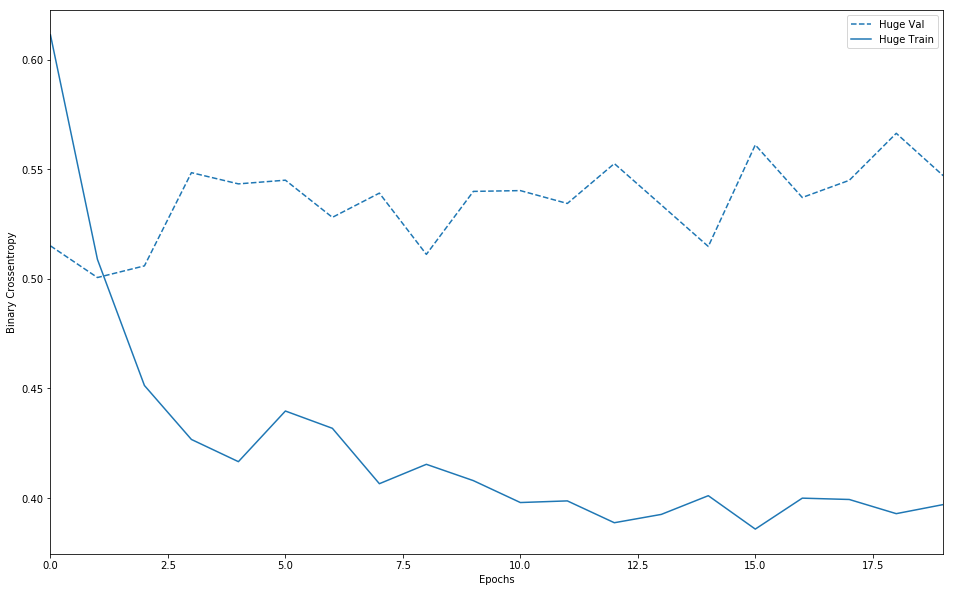

In [876]:
import matplotlib.pyplot as plt
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('huge', model_history)])

In [877]:
temp_test.drop(["PassengerId"],axis=1)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
5,3,14.00000,0,0,9.2250,0.0,1.0,0.0,0.0,1.0
6,3,30.00000,0,0,7.6292,1.0,0.0,0.0,1.0,0.0
7,2,26.00000,1,1,29.0000,0.0,1.0,0.0,0.0,1.0
8,3,18.00000,0,0,7.2292,1.0,0.0,1.0,0.0,0.0
9,3,21.00000,2,0,24.1500,0.0,1.0,0.0,0.0,1.0


In [878]:
res = model.predict(scaler.transform(temp_test.drop(["PassengerId"],axis=1).values))
temp_test["Survived"]=res

In [879]:
p=temp_test.dropna()[["Survived"]].round().applymap(np.int64)

In [880]:
temp_test["Survived"]=p

In [881]:
temp_test.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           1
PassengerId    0
Sex_female     0
Sex_male       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Survived       1
dtype: int64

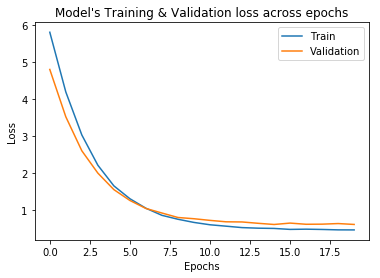

In [882]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

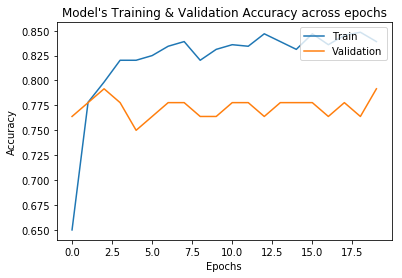

In [883]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [908]:
p=temp_test.fillna(0)[["Survived"]].round().applymap(np.int64)

In [909]:
temp_test["Survived"]=p

In [910]:
temp_test

,Pclass,Age,SibSp,Parch,Fare,PassengerId,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,34.50000,0,0,7.8292,892,0.0,1.0,0.0,1.0,0.0,0
1,3,47.00000,1,0,7.0000,893,1.0,0.0,0.0,0.0,1.0,0
2,2,62.00000,0,0,9.6875,894,0.0,1.0,0.0,1.0,0.0,0
3,3,27.00000,0,0,8.6625,895,0.0,1.0,0.0,0.0,1.0,0
4,3,22.00000,1,1,12.2875,896,1.0,0.0,0.0,0.0,1.0,0
5,3,14.00000,0,0,9.2250,897,0.0,1.0,0.0,0.0,1.0,0
6,3,30.00000,0,0,7.6292,898,1.0,0.0,0.0,1.0,0.0,1
7,2,26.00000,1,1,29.0000,899,0.0,1.0,0.0,0.0,1.0,0
8,3,18.00000,0,0,7.2292,900,1.0,0.0,1.0,0.0,0.0,1
9,3,21.00000,2,0,24.1500,901,0.0,1.0,0.0,0.0,1.0,0


In [898]:
temp_test[["PassengerId","Survived"]].isnull().sum()

PassengerId    0
Survived       1
dtype: int64

In [900]:
temp_test[["PassengerId","Survived"]].shape

(418, 2)

In [902]:
temp_test.shape

(418, 12)

In [896]:
tdf.shape

(418, 11)

In [912]:
temp_test[["PassengerId","Survived"]].to_csv("a.csv",index=False)